In [7]:
%matplotlib inline
from Simulation import *
import datetime, time
from scipy import ndimage

In [10]:
len(Data)

1392667

In [11]:
Data = np.fromfile('test.raw', dtype='int16', sep="")

In [15]:
Data = np.loadtxt('Bragg_power.txt')

In [16]:
np.shape(Data)

(100, 3)

[ 19778      0      0 -20726   6449     54      0     40      0   1360
      0  -1024     -1      1     16      0      0      0      0      0
      0      0      0      0      0      0      0]


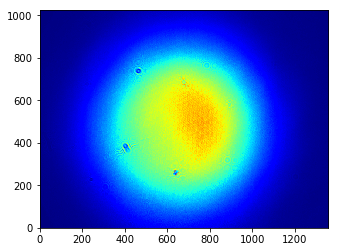

In [9]:
%Here, Chenhui plots a test profile image that he took with or Thorlabs Beam Profiler (BC106N-VIS). It has 1024*1360 pixels. Therefore, he is reshaping the file which is just a 1D list of intensity numbers.Data = np.fromfile('FFT/DeviceData_#001.raw', dtype='int16', sep="")
np.shape(Data)
Info = Data[:27]
np.shape(Info)
print(Info)
Ixy = Data[27:]
Ixy=Ixy.reshape([1024,1360])
plt.imshow(Ixy, cmap=plt.cm.jet, origin='bottom')
plt.show()

In [48]:
Ix = Ixy[480,:]

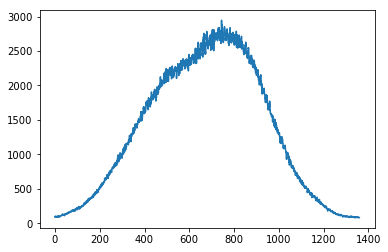

In [49]:
plt.plot(Ix)
plt.show()

In [50]:
Iy = Ixy[:,700]

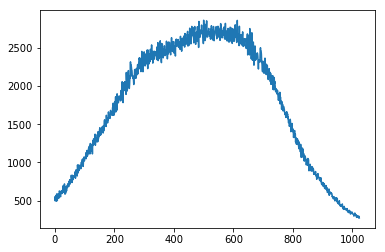

In [51]:
plt.plot(Iy)
plt.show()

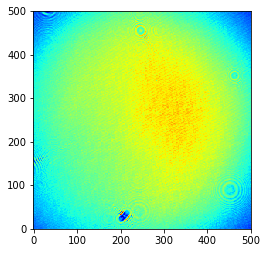

In [52]:
plt.imshow(Ixy[(480-250):(480+250),(680-250):(680+250)], cmap=plt.cm.jet, origin='bottom')
plt.show()

In [53]:
Ikx = abs(np.fft.fft(Ix))**2

In [54]:
Ikx = Ikx/Ikx[0]

In [55]:
Iky = abs(np.fft.fft(Iy))**2
Iky = Iky/Iky[0]

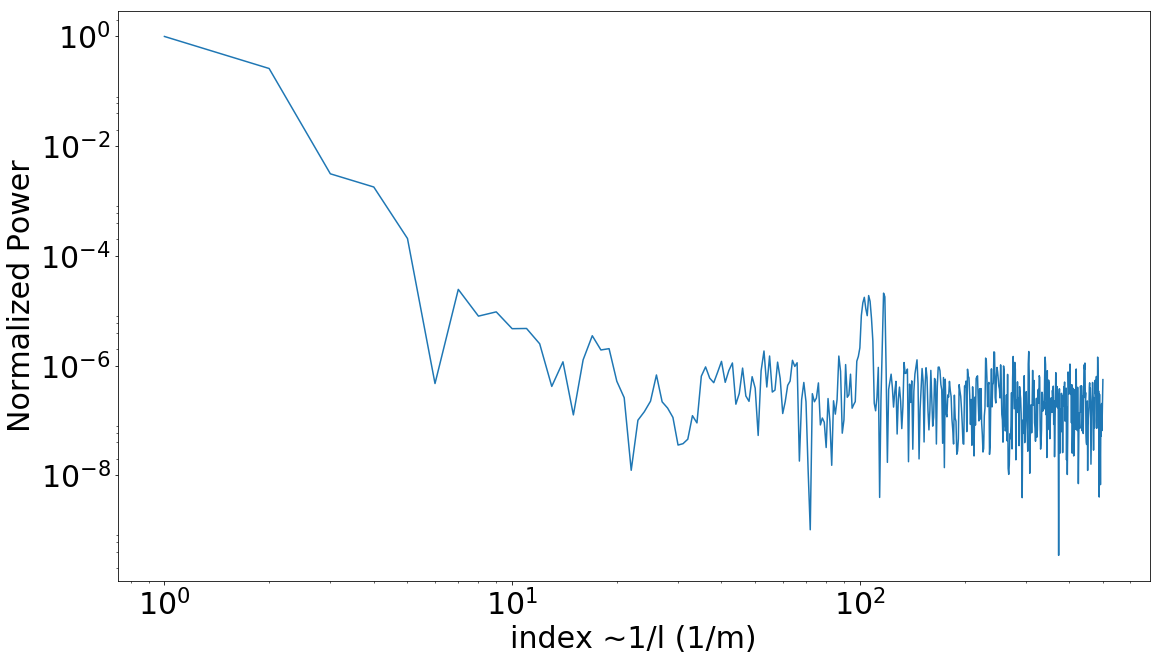

In [57]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel("index ~1/l (1/m)", fontsize = 30)
plt.ylabel("Normalized Power", fontsize = 30)
plt.loglog(np.arange(1,501),Ikx[0:500])
plt.savefig('kx_PSD.pdf')
plt.show()

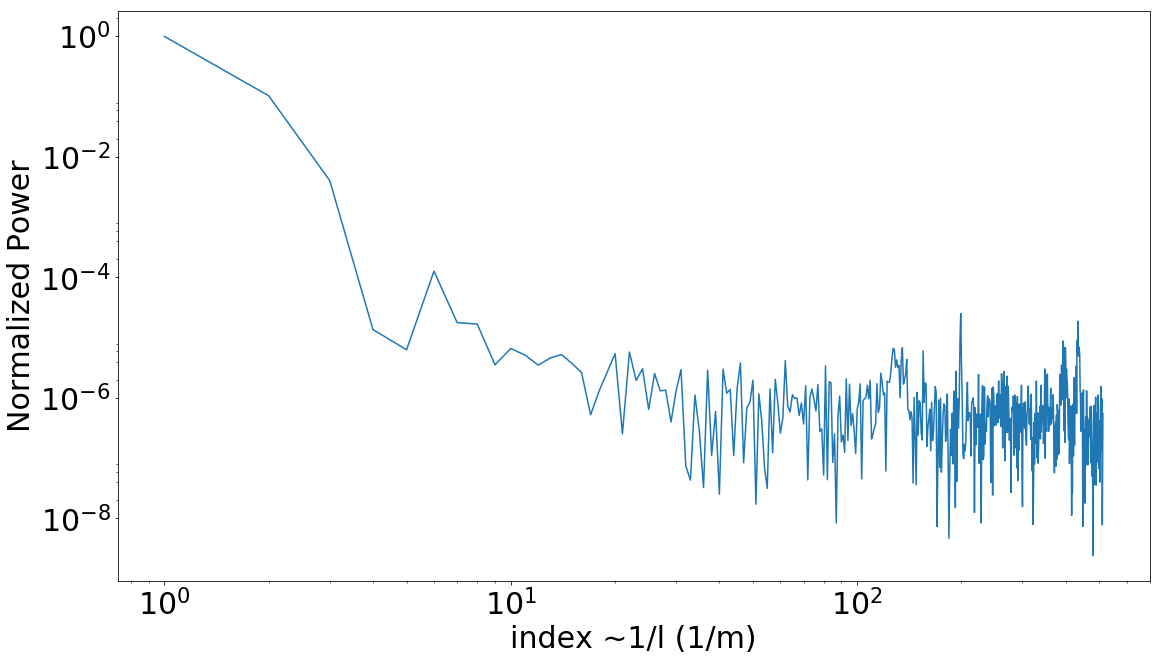

In [58]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel("index ~1/l (1/m)", fontsize = 30)
plt.ylabel("Normalized Power", fontsize = 30)
plt.loglog(np.arange(1,513),Iky[0:512])
plt.savefig('ky_PSD.pdf')
plt.show()

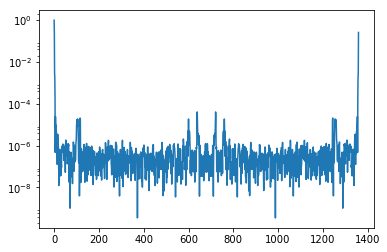

In [33]:
plt.semilogy(Ikx)
plt.show()

In [4]:
import MC
import timeit

In [5]:
dir(MC)

['MonteCarloCCD',
 '__builtins__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__test__',
 'datetime',
 'np',
 'time']

In [6]:
kwargs = {}
kwargs['size'] = 1000000
kwargs['Bragg_peak_rel'] = 1.39
kwargs['Bloch_peak_rel'] = 0.28
kwargs['xc'] = [0,0]
kwargs['vc'] = [0,0]
kwargs['v_2nd_Bragg'] = 2.0480821101976
kwargs['g'] = 9.79958
kwargs['sigma_x'] = 0.002
kwargs['sigma_v'] = 0.0035
time_start = timeit.default_timer()
xy_t = MC.MonteCarloCCD(1, **kwargs)
time_end = timeit.default_timer()
print(time_end-time_start)

9.518076948996168


In [7]:
random_var = np.random.normal(0, sigma_x, size*2)
#xy_t[:,0] = random_var[0:size]+xc

In [6]:
sigma_x = 0.002
size = 10000

In [9]:
xy_t = np.zeros([size,2])

In [11]:
print(np.shape(xy_t))
print(np.shape(random_var))

(10000, 2)
(20000,)


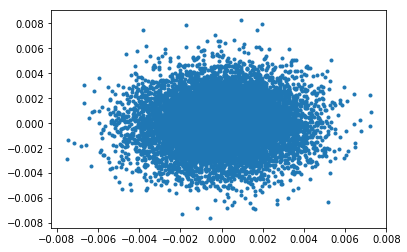

In [5]:
plt.plot(xy_t[:,0], xy_t[:,1],'.')
plt.show()